In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [2]:
debt_df=pd.read_csv('external-debt_gha.csv')
debt_df.head(5)

,Country Name,Country ISO3,Year,Indicator Name,Indicator Code,Value
0,#country+name,#country+code,#date+year,#indicator+name,#indicator+code,#indicator+value+num
1,Ghana,GHA,2020,"Imports of goods, services and primary income ...",BM.GSR.TOTL.CD,28682367748.3215
2,Ghana,GHA,2019,"Imports of goods, services and primary income ...",BM.GSR.TOTL.CD,31343329905.2418
3,Ghana,GHA,2018,"Imports of goods, services and primary income ...",BM.GSR.TOTL.CD,27740645304.6924
4,Ghana,GHA,2017,"Imports of goods, services and primary income ...",BM.GSR.TOTL.CD,25172990000


#### 2635 rows 6 columns

### EDA

In [3]:
debt_df.columns

Index(['Country Name', 'Country ISO3', 'Year', 'Indicator Name',
       'Indicator Code', 'Value'],
      dtype='object')

In [4]:
debt_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2635 entries, 0 to 2634
Data columns (total 6 columns):
 #   Column          Non-Null Count  Dtype 
---  ------          --------------  ----- 
 0   Country Name    2635 non-null   object
 1   Country ISO3    2635 non-null   object
 2   Year            2635 non-null   object
 3   Indicator Name  2635 non-null   object
 4   Indicator Code  2635 non-null   object
 5   Value           2635 non-null   object
dtypes: object(6)
memory usage: 123.6+ KB


In [5]:
# dropping first row
debt_df = debt_df.drop([debt_df.index[0]])

In [6]:
# Dropping column
debt_df = debt_df.drop(columns = ['Country ISO3'])

In [7]:
# Converting columns into correct type
debt_df['Year'] = pd.to_numeric(debt_df['Year'])
debt_df['Value'] = pd.to_numeric(debt_df['Value'])

In [8]:
debt_df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 2634 entries, 1 to 2634
Data columns (total 5 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   Country Name    2634 non-null   object 
 1   Year            2634 non-null   int64  
 2   Indicator Name  2634 non-null   object 
 3   Indicator Code  2634 non-null   object 
 4   Value           2634 non-null   float64
dtypes: float64(1), int64(1), object(3)
memory usage: 123.5+ KB


In [10]:
debt_df['Country Name'].value_counts()

Ghana    2634
Name: Country Name, dtype: int64

In [11]:
debt_df['Year'].value_counts()

1990    55
1986    55
1996    55
1991    55
1994    54
        ..
1964     7
1963     7
1962     7
1961     7
1960     7
Name: Year, Length: 61, dtype: int64

In [12]:
debt_df['Indicator Name'].value_counts()

GNI (current US$)                                                                      61
Total reserves (includes gold, current US$)                                            61
Net ODA received per capita (current US$)                                              60
Grants, excluding technical cooperation (BoP, current US$)                             60
Technical cooperation grants (BoP, current US$)                                        60
                                                                                       ..
Portfolio investment, bonds (PPG + PNG) (NFL, current US$)                              7
PNG, bonds (NFL, current US$)                                                           4
Present value of external debt (current US$)                                            1
Present value of external debt (% of GNI)                                               1
Present value of external debt (% of exports of goods, services and primary income)     1
Name: Indi

In [13]:
debt_df['Indicator Code'].value_counts()

NY.GNP.MKTP.CD       61
FI.RES.TOTL.CD       61
DT.ODA.ODAT.PC.ZS    60
BX.GRT.EXTA.CD.WD    60
BX.GRT.TECH.CD.WD    60
                     ..
DT.NFL.BOND.CD        7
DT.NFL.PNGB.CD        4
DT.DOD.PVLX.CD        1
DT.DOD.PVLX.GN.ZS     1
DT.DOD.PVLX.EX.ZS     1
Name: Indicator Code, Length: 61, dtype: int64

In [14]:
debt_df['Value'].value_counts()

0.000000e+00    74
2.531890e+08     9
1.000000e+07     8
1.000000e+06     7
1.000000e+09     5
                ..
9.803000e-01     1
8.889000e-01     1
2.466000e+06     1
3.891000e+06     1
1.203223e+09     1
Name: Value, Length: 2444, dtype: int64

In [15]:
debt_df.describe()

,Year,Value
count,2634.000000,2.634000e+03
mean,1994.615034,1.159303e+09
std,14.922176,4.670520e+09
min,1960.000000,-5.704035e+09
25%,1982.000000,1.002832e+01
50%,1995.000000,2.149150e+07
75%,2007.000000,3.315758e+08
max,2020.000000,7.077663e+10


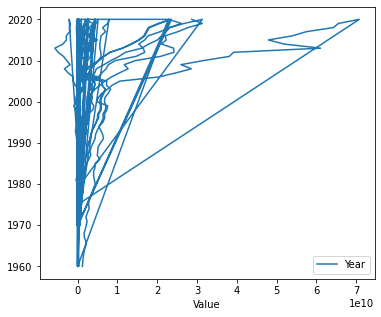

In [16]:
debt_df.plot.line(x='Value', y='Year', figsize=(6,5))
plt.show()

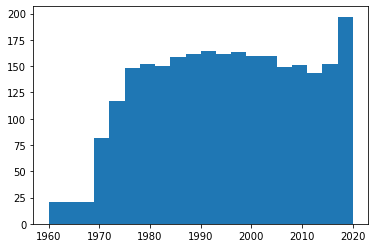

In [17]:
plt.hist(debt_df['Year'], bins = 20)
plt.show()

In [18]:
debt_df.groupby('Year').sum()

,Value
Year,
1960,1.487129e+09
1961,1.445358e+09
1962,1.537890e+09
1963,1.660837e+09
1964,1.865327e+09
...,...
2016,1.796055e+11
2017,1.916769e+11
2018,2.083994e+11


<AxesSubplot:ylabel='Value'>

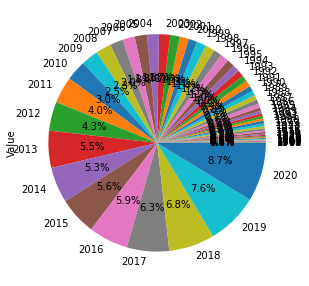

In [19]:
plt.figure(figsize = (5,5))
debt_df.groupby('Year').sum()['Value'].plot(kind = 'pie',autopct = '%1.1f%%')

In [20]:
debt_df.groupby(['Indicator Name']).mean().sort_values('Value', ascending = False)

,Year,Value
Indicator Name,,
Present value of external debt (current US$),2020.0,2.300000e+10
GNI (current US$),1990.0,1.442126e+10
"Imports of goods, services and primary income (BoP, current US$)",1997.5,8.139209e+09
"External debt stocks, total (DOD, current US$)",1995.0,7.055972e+09
"Exports of goods, services and primary income (BoP, current US$)",1997.5,5.940971e+09
...,...,...
Total reserves in months of imports,1997.5,3.254796e+00
Public and publicly guaranteed debt service (% of GNI),1995.0,2.587685e+00
"PNG, commercial banks and other creditors (NFL, current US$)",1994.5,-1.205050e+06


In [21]:
debt_df.groupby(['Indicator Code']).mean().sort_values('Value', ascending = False)

,Year,Value
Indicator Code,,
DT.DOD.PVLX.CD,2020.0,2.300000e+10
NY.GNP.MKTP.CD,1990.0,1.442126e+10
BM.GSR.TOTL.CD,1997.5,8.139209e+09
DT.DOD.DECT.CD,1995.0,7.055972e+09
BX.GSR.TOTL.CD,1997.5,5.940971e+09
...,...,...
FI.RES.TOTL.MO,1997.5,3.254796e+00
DT.TDS.DPPG.GN.ZS,1995.0,2.587685e+00
DT.NFL.PNGC.CD,1994.5,-1.205050e+06


#### From this data, The year Ghana recorded the highest debt value is 2020 with a value of 7.077663e+10. 
#### 1960 recorded the least debt value with -5.704035e+09.
#### I plotted with three different graphs for different visulaizations of the data.